In [45]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Loading Dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Quick overview
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Dataset contains 9712 rows and 8 columns


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [47]:
print("Dataset Info")
# Data types and non-null counts
df.info()

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [48]:
# Descriptive Statistics for Numeric Columns
print("Descriptive Statistics for Numeric Columns:")
display(df.describe())

# Descriptive Statistics for Object (Categorical) Columns
print("Descriptive Statistics for Object Columns:")
display(df.describe(include=["O"]))

Descriptive Statistics for Numeric Columns:


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


Descriptive Statistics for Object Columns:


,Gender,Primary_Device,Health_Impacts,Urban_or_Rural
count,9712,9712,6494,9712
unique,2,4,15,2
top,Male,Smartphone,Poor Sleep,Urban
freq,4942,4568,2268,6851


Missing Values per Column:


,Missing Values
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


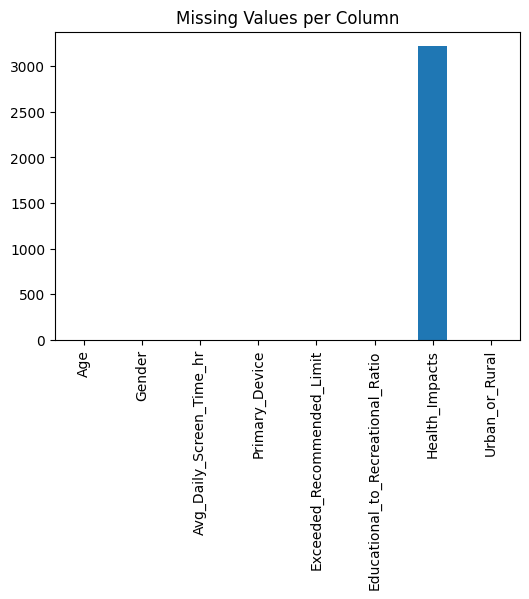


 Number of Duplicate Rows: 44


In [49]:
# Missing values
print("Missing Values per Column:")
display(df.isnull().sum().to_frame("Missing Values"))
print("\n")

# Visualizing missing values
df.isnull().sum().plot(kind="bar", figsize=(6,4))
plt.title("Missing Values per Column")
plt.show()

# Duplicate Values
print(f"\n Number of Duplicate Rows: {df.duplicated().sum()}")

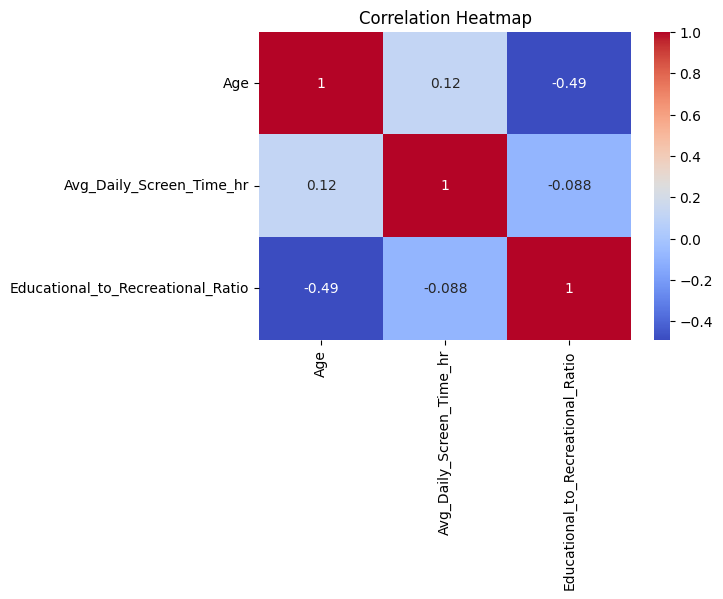

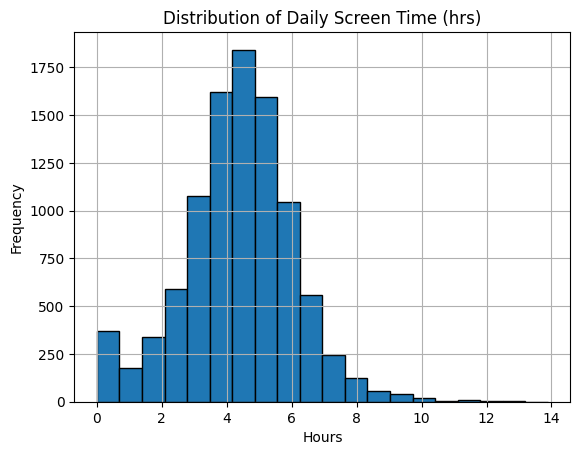

In [50]:
# Correlation Heatmap
plt.figure(figsize=(6,4))

# Selected only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
print("\n")

# Distribution of Screen Time
df['Avg_Daily_Screen_Time_hr'].hist(bins=20, edgecolor='black')
plt.title("Distribution of Daily Screen Time (hrs)")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()

In [51]:
# Outlier Detection (IQR)
Q1 = df['Avg_Daily_Screen_Time_hr'].quantile(0.25)
Q3 = df['Avg_Daily_Screen_Time_hr'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Avg_Daily_Screen_Time_hr'] < (Q1 - 1.5*IQR)) |
              (df['Avg_Daily_Screen_Time_hr'] > (Q3 + 1.5*IQR))]
print(f" Number of Outliers detected: {outliers.shape[0]}")
outliers.head()

 Number of Outliers detected: 448


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
19,9,Female,0.00,TV,False,0.42,NaN,Urban
28,8,Male,0.31,Smartphone,False,0.51,NaN,Urban
36,10,Male,11.68,TV,True,0.47,Poor Sleep,Urban
46,9,Female,0.00,Smartphone,False,0.47,NaN,Urban
58,9,Male,0.00,Smartphone,False,0.59,NaN,Rural


---
# ***I. Dataset Overview***
---
*   The dataset comprises 9712 records and 8 distinct features, detailing the screen time habits of children in India between the ages of 8 and 18.

*   The mean daily screen time is 4.35 hours, with a median of 4.44 hours.

*   The demographic breakdown indicates a majority of participants reside in Urban areas (70.5%) and the Smartphone is the most frequently used primary device (47%). The gender distribution is nearly even.
---
# ***II. Data Quality and Integrity***
*   Missing Values: The Health_Impacts feature has a significant amount of missing data, with 3,218 null entries (33.1% of the column). This poses a limitation for any conclusive analysis of health-related outcomes.

*   Duplicate Records: The analysis identified 44 duplicate rows within the dataset.

*   Outliers: Using the Interquartile Range (IQR) method on the Avg_Daily_Screen_Time_hr variable, 448 records were identified as outliers. These data points represent children with screen time habits that are statistically extreme compared to the central tendency of the data.
---
# ***III. Analytical Findings***
---


*   Variable Correlations: The correlation analysis revealed no significant linear relationship between the primary numeric variables: Age, Avg_Daily_Screen_Time_hr, and Educational_to_Recreational_Ratio.

*   Data Distribution: The distribution of Avg_Daily_Screen_Time_hr approximates a normal distribution, centered around a mean of approximately 4-5 hours.

*   Reported Health Impacts: Among the non-null entries, "Poor Sleep" was the most frequently reported health impact associated with screen time.
---